In [1]:
__author__ = 'Erwin Chen'
# %matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import numpy as np
import random
from sklearn.covariance import empirical_covariance, MinCovDet

In [2]:
# load data from fits file
hdulist = fits.open('allStar-v603.fits')
hdulist.info()
tbdata = hdulist[1].data
# APOGEE ID for stars
apogee_ID = tbdata.field('APOGEE_ID')
# Galactic Longitude
l = tbdata.field('GLON')
# Galactic Latitude 
b = tbdata.field('GLAT')
# Right Ascension(J2000)
RA = tbdata.field('RA')
# Declination(J2000)
DEC = tbdata.field('DEC')
# Heliocentric radial velocity
RV = tbdata.field('VHELIO_AVG')
J = tbdata.field('J')
H = tbdata.field('H')
K = tbdata.field('K')
LOGG = tbdata.field('LOGG')
TEFF = tbdata.field('TEFF')
# Proper Motion
PMRA = tbdata.field('PMRA')
PMDEC = tbdata.field('PMDEC')
# 15 elements
elements = np.array(["Al", "Ca", "C", "Fe", "K", "Mg", "Mn", "Na", "Ni", "N", "O", "Si", "S", "Ti", "V"])
AL_H = tbdata.field("AL_H")
CA_H = tbdata.field("CA_H")
C_H = tbdata.field("C_H")
FE_H = tbdata.field('FE_H')
K_H = tbdata.field("K_H")
MG_H = tbdata.field("MG_H")
MN_H = tbdata.field("MN_H")
NA_H = tbdata.field("NA_H")
NI_H = tbdata.field("NI_H")
N_H = tbdata.field("N_H")
O_H = tbdata.field("O_H")
SI_H = tbdata.field("SI_H")
S_H = tbdata.field("S_H")
TI_H = tbdata.field("TI_H")
V_H = tbdata.field("V_H")
# errors for 15 elements
AL_H_ERR = tbdata.field("AL_H_ERR")
CA_H_ERR = tbdata.field("CA_H_ERR")
C_H_ERR = tbdata.field("C_H_ERR")
FE_H_ERR = tbdata.field("FE_H_ERR")
K_H_ERR = tbdata.field("K_H_ERR")
MG_H_ERR = tbdata.field("MG_H_ERR")
MN_H_ERR = tbdata.field("MN_H_ERR")
NA_H_ERR = tbdata.field("NA_H_ERR")
NI_H_ERR = tbdata.field("NI_H_ERR")
N_H_ERR = tbdata.field("N_H_ERR")
O_H_ERR = tbdata.field("O_H_ERR")
SI_H_ERR = tbdata.field("SI_H_ERR")
S_H_ERR = tbdata.field("S_H_ERR")
TI_H_ERR = tbdata.field("TI_H_ERR")
V_H_ERR = tbdata.field("V_H_ERR")

Filename: allStar-v603.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      15   ()              
1                BinTableHDU    324   163278R x 151C   [45A, 34A, 44A, 34A, 18A, 8A, I, 16A, E, E, E, E, E, E, D, D, D, D, J, J, 116A, J, I, E, J, 129A, J, 59A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, 2E, 2E, 2E, 5A, 6A, 4A, I, 7E, 7E, 49E, 49E, 15E, 15E, 15E, 15E, E, E, E, E, E, E, E, E, E, 2A, J, 153A, 7J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, 15E, 15J, 18A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 17A, E, E, I, I, E, E, 20A, 737A, 665A, 50J, 50J]   
2                ImageHDU         6   (360,)       int32   
3                BinTableHDU     31   1R x 4C      [105A, 30A, 90A, 15I]   


In [3]:
# get chemical abundances of 15 elements for all available stars
def get_matrix_all():
    # get stars with valid info
    C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    data = []
    data.append(C_H[C])
    data.append(FE_H[C])
    data.append(N_H[C])
    data.append(O_H[C])
    data.append(MG_H[C])
    data.append(SI_H[C])
    data.append(NI_H[C])
    data.append(AL_H[C])
    data.append(CA_H[C])
    data.append(MN_H[C])
    data.append(NA_H[C])
    data.append(S_H[C])
    data.append(K_H[C])
    data.append(TI_H[C])
    data.append(V_H[C])
    data = np.array(data)
    data = data.T
    return data

# get chemical abundances of 15 elements for selected stars
def get_matrix(C):
    data = []
    data.append(C_H[C])
    data.append(FE_H[C])
    data.append(N_H[C])
    data.append(O_H[C])
    data.append(MG_H[C])
    data.append(SI_H[C])
    data.append(NI_H[C])
    data.append(AL_H[C])
    data.append(CA_H[C])
    data.append(MN_H[C])
    data.append(NA_H[C])
    data.append(S_H[C])
    data.append(K_H[C])
    data.append(TI_H[C])
    data.append(V_H[C])
    data = np.array(data)
    data = data.T
    return data

def get_matrix_all_normalized():
    # get stars with valid info
    C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    data = []
    data.append(C_H[C] / np.mean(C_H_ERR[C]))
    data.append(FE_H[C] / np.mean(FE_H_ERR[C]))
    data.append(N_H[C] / np.mean(N_H_ERR[C]))
    data.append(O_H[C] / np.mean(O_H_ERR[C]))
    data.append(MG_H[C] / np.mean(MG_H_ERR[C]))
    data.append(SI_H[C] / np.mean(SI_H_ERR[C]))
    data.append(NI_H[C] / np.mean(NI_H_ERR[C]))
    data.append(AL_H[C] / np.mean(AL_H_ERR[C]))
    data.append(CA_H[C] / np.mean(CA_H_ERR[C]))
    data.append(MN_H[C] / np.mean(MN_H_ERR[C]))
    data.append(NA_H[C] / np.mean(NA_H_ERR[C]))
    data.append(S_H[C] / np.mean(S_H_ERR[C]))
    data.append(K_H[C] / np.mean(K_H_ERR[C]))
    data.append(TI_H[C] / np.mean(TI_H_ERR[C]))
    data.append(V_H[C] / np.mean(V_H_ERR[C]))
    data = np.array(data)
    data = data.T
    return data

def get_matrix_normalized(C):
    data = []
    data.append(C_H[C] / np.mean(C_H_ERR[C]))
    data.append(FE_H[C] / np.mean(FE_H_ERR[C]))
    data.append(N_H[C] / np.mean(N_H_ERR[C]))
    data.append(O_H[C] / np.mean(O_H_ERR[C]))
    data.append(MG_H[C] / np.mean(MG_H_ERR[C]))
    data.append(SI_H[C] / np.mean(SI_H_ERR[C]))
    data.append(NI_H[C] / np.mean(NI_H_ERR[C]))
    data.append(AL_H[C] / np.mean(AL_H_ERR[C]))
    data.append(CA_H[C] / np.mean(CA_H_ERR[C]))
    data.append(MN_H[C] / np.mean(MN_H_ERR[C]))
    data.append(NA_H[C] / np.mean(NA_H_ERR[C]))
    data.append(S_H[C] / np.mean(S_H_ERR[C]))
    data.append(K_H[C] / np.mean(K_H_ERR[C]))
    data.append(TI_H[C] / np.mean(TI_H_ERR[C]))
    data.append(V_H[C] / np.mean(V_H_ERR[C]))
    data = np.array(data)
    data = data.T
    return data

In [4]:
# calculate covariance matrix for all stars
# get data matrix for all stars
data = get_matrix_all()
sample = np.array(random.sample(data, 2000))
print data.shape
print sample.shape
# covarianceof a sample
cov = np.cov(sample.T)
# print np.around(np.cov(sample.T), decimals=2)
# empirical covariance
emp_cov = empirical_covariance(data, assume_centered=False)
# print np.around(emp_cov.covariance_, decimals=2)
# robust covariance
mcd = MinCovDet().fit(data)
# print np.around(mcd.covariance_, decimals=2)

(84452, 15)
(2000, 15)


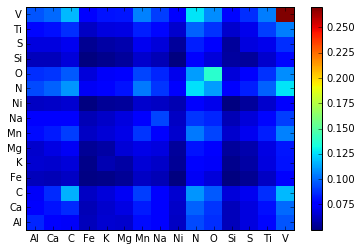

In [5]:
# plot covariance of a sample
fig = plt.figure()
plt.pcolor(cov)
plt.colorbar()
plt.yticks(np.arange(0.5,15.5),elements)
plt.xticks(np.arange(0.5,15.5),elements)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

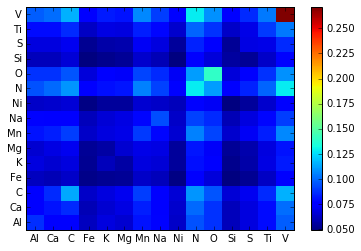

In [6]:
# plot empirical covariance
fig = plt.figure()
plt.pcolor(emp_cov)
plt.colorbar()
plt.yticks(np.arange(0.5,15.5),elements)
plt.xticks(np.arange(0.5,15.5),elements)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

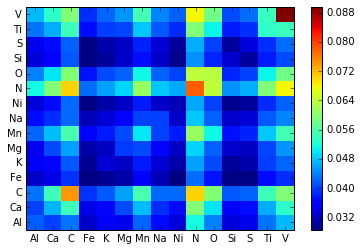

In [7]:
# plot robust covariance
fig = plt.figure()
plt.pcolor(mcd.covariance_)
plt.colorbar()
plt.yticks(np.arange(0.5,15.5),elements)
plt.xticks(np.arange(0.5,15.5),elements)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

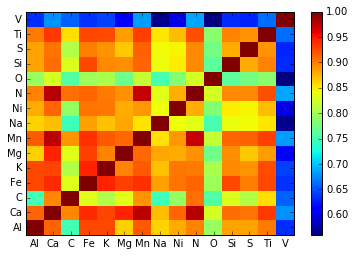

In [8]:
# get the correlation matrix for all stars
correlation = np.corrcoef(data.T)
# plot correlation matrix
fig = plt.figure()
plt.pcolor(correlation)
plt.colorbar()
plt.yticks(np.arange(0.5,15.5),elements)
plt.xticks(np.arange(0.5,15.5),elements)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

there are 559 known members
there are 15 stars in M107 with chemical abundances of all 15 elements


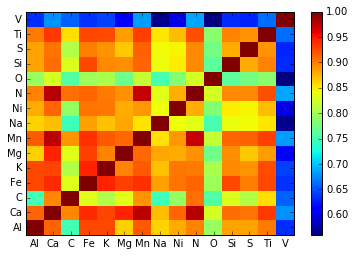

there are 20 stars in M13 with chemical abundances of all 15 elements


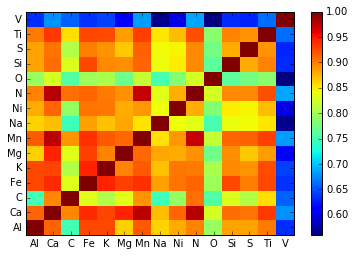

there are 43 stars in M5 with chemical abundances of all 15 elements


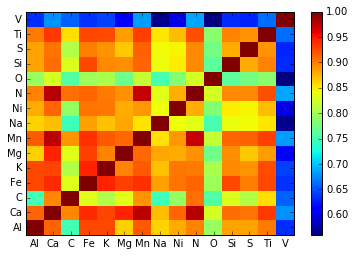

there are 29 stars in N6819 with chemical abundances of all 15 elements


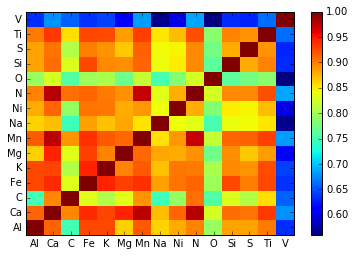

there are 24 stars in M67 with chemical abundances of all 15 elements


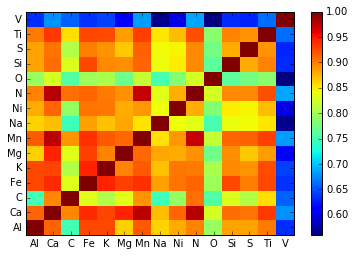

In [9]:
# get covariance matrix for knwon clusters
# load known members
known_clusters = np.loadtxt('table4.dat', usecols=(0, 1), dtype=('S', 'S'), unpack=True)
# names of all known clusters
known_clusters_names = known_clusters[1]
# M92, M15, M53, N5466, M2, M13, M3, M5, M107, M71, N2158, N2420, N188, M67, Pleiades, N6819, N6791
# APOGEE IDs for all known members
known_clusters_ID = known_clusters[0]
# get all known members
members = np.array([np.where(ID == apogee_ID)[0][0] for ID in known_clusters_ID])
print "there are %i known members"%(members.size)
# get stars with all 15 elements
C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
# get members with all 15 elements
members_15 = np.intersect1d(C, members)
# list of names of clusters to check
clusters_names = np.array(["M107", "M13", "M5", "N6819", "M67"])
for name in clusters_names:
    # get members of a known cluster
    name_members_ID = known_clusters_ID[np.where(name == known_clusters_names)]
    name_members = np.array([np.where(ID == apogee_ID)[0][0] for ID in name_members_ID])
    name_members = np.intersect1d(name_members, members_15)
    print "there are %i stars in %s with chemical abundances of all 15 elements"%(name_members.size, name)
    # get data matrix for a known cluster
    name_data = get_matrix(name_members)
    # get correlation matrix for a known cluster
    correlation = np.corrcoef(data.T)
    # plot correlation matrix
    fig = plt.figure()
    plt.pcolor(correlation)
    plt.colorbar()
    plt.yticks(np.arange(0.5,15.5),elements)
    plt.xticks(np.arange(0.5,15.5),elements)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.show()